<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-17 19:17:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  70.8MB/s    in 2.8s    

2025-09-17 19:17:09 (70.8 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [4]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


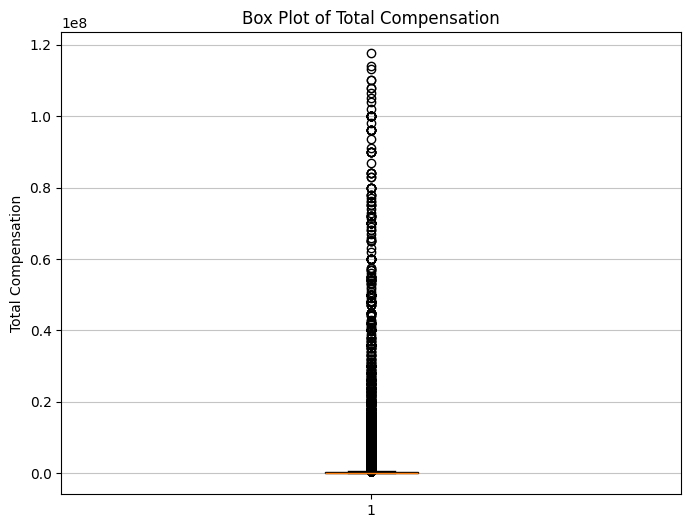

In [8]:
query = "SELECT CompTotal FROM main"
df = pd.read_sql_query(query, conn)

df_clean = df.dropna(subset=['CompTotal'])

max_comp = df_clean['CompTotal'].quantile(0.99)
df_filtered = df_clean[df_clean['CompTotal'] <= max_comp]

plt.figure(figsize=(8,6))
plt.boxplot(df_filtered['CompTotal'], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Box Plot of Total Compensation')
plt.ylabel('Total Compensation')
plt.grid(axis='y', alpha=0.75)
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


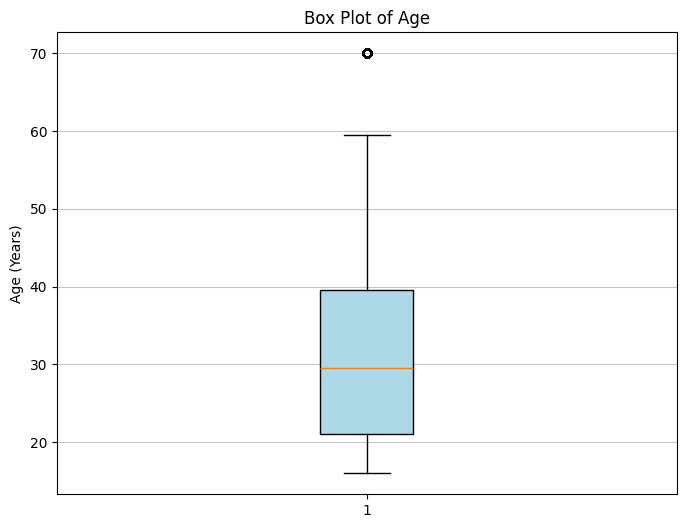

In [9]:
query = "SELECT Age FROM main"
df = pd.read_sql_query(query, conn)

df = df.dropna(subset=['Age'])

age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['AgeNumeric'] = df['Age'].map(age_mapping)

df = df.dropna(subset=['AgeNumeric'])

plt.figure(figsize=(8,6))
plt.boxplot(df['AgeNumeric'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'))
plt.title('Box Plot of Age')
plt.ylabel('Age (Years)')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1200x600 with 0 Axes>

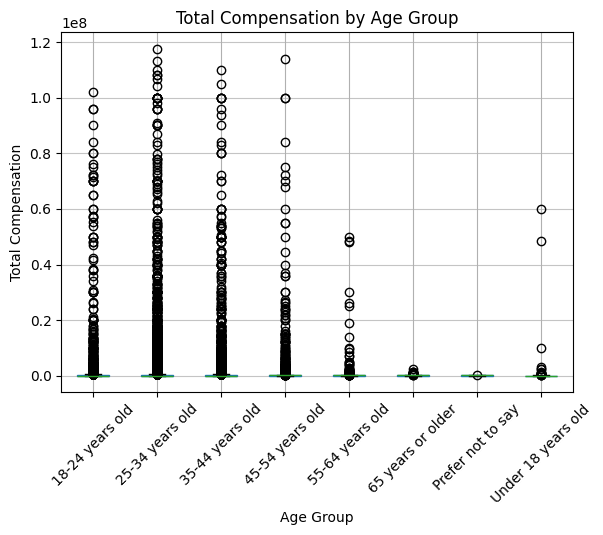

In [10]:
query = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(query, conn)

df = df.dropna(subset=['Age', 'CompTotal'])

max_comp = df['CompTotal'].quantile(0.99)
df_filtered = df[df['CompTotal'] <= max_comp]

plt.figure(figsize=(12,6))
df_filtered.boxplot(column='CompTotal', by='Age', patch_artist=True)
plt.title('Total Compensation by Age Group')
plt.suptitle('')  # remove default title
plt.ylabel('Total Compensation')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 1200x600 with 0 Axes>

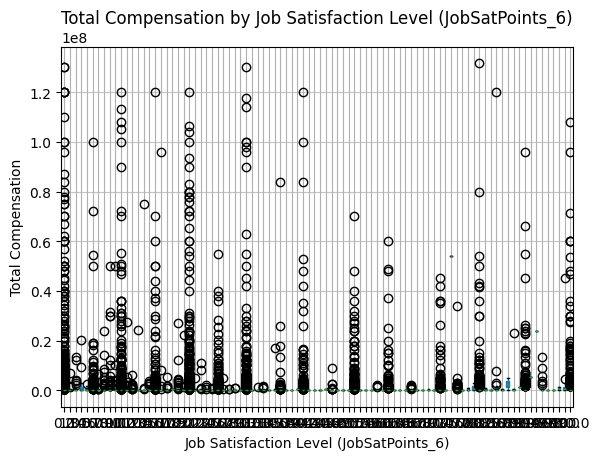

In [11]:
query = "SELECT CompTotal, JobSatPoints_6 FROM main"
df = pd.read_sql_query(query, conn)

df = df.dropna(subset=['CompTotal', 'JobSatPoints_6'])

max_comp = df['CompTotal'].quantile(0.99)
df_filtered = df[df['CompTotal'] <= max_comp]

plt.figure(figsize=(12,6))
df_filtered.boxplot(column='CompTotal', by='JobSatPoints_6', patch_artist=True)
plt.title('Total Compensation by Job Satisfaction Level (JobSatPoints_6)')
plt.suptitle('')  # remove default title
plt.ylabel('Total Compensation')
plt.xlabel('Job Satisfaction Level (JobSatPoints_6)')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1200x600 with 0 Axes>

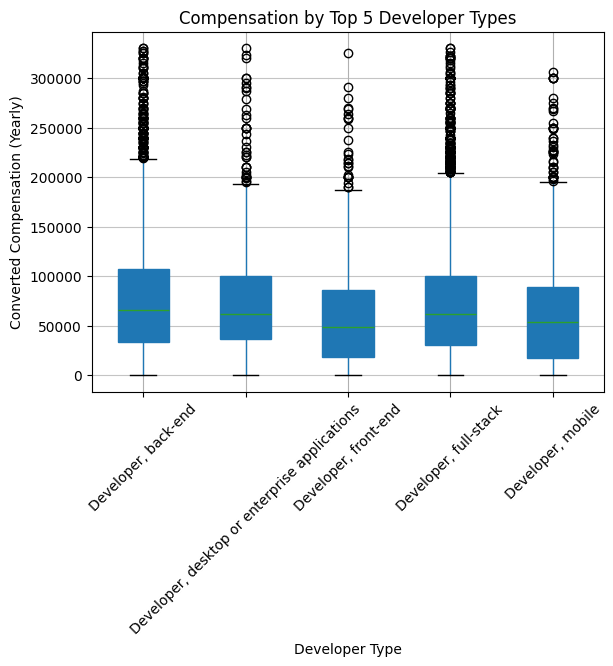

In [12]:
query = "SELECT DevType, ConvertedCompYearly FROM main"
df = pd.read_sql_query(query, conn)

df = df.dropna(subset=['DevType', 'ConvertedCompYearly'])

df_exploded = df.assign(DevType=df['DevType'].str.split(';')).explode('DevType')

df_exploded['DevType'] = df_exploded['DevType'].str.strip()

top5_devtypes = df_exploded['DevType'].value_counts().head(5).index

df_top5 = df_exploded[df_exploded['DevType'].isin(top5_devtypes)]

max_comp = df_top5['ConvertedCompYearly'].quantile(0.99)
df_top5_filtered = df_top5[df_top5['ConvertedCompYearly'] <= max_comp]

plt.figure(figsize=(12,6))
df_top5_filtered.boxplot(column='ConvertedCompYearly', by='DevType', patch_artist=True)
plt.title('Compensation by Top 5 Developer Types')
plt.suptitle('')
plt.ylabel('Converted Compensation (Yearly)')
plt.xlabel('Developer Type')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1200x600 with 0 Axes>

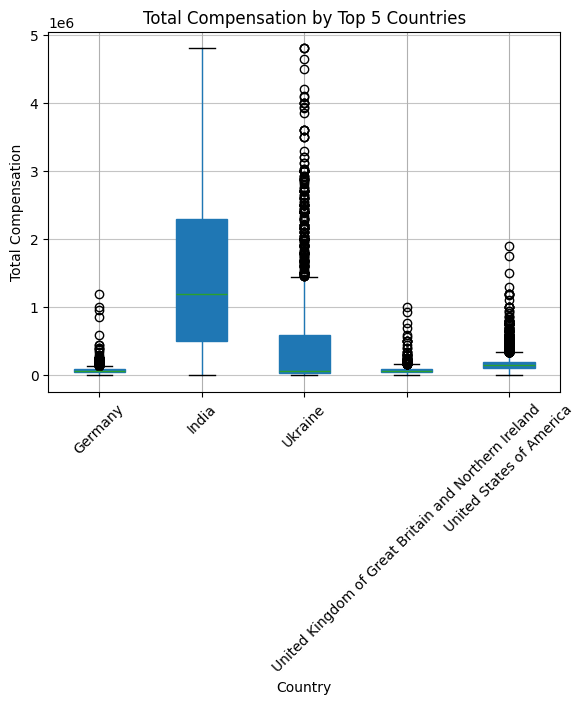

In [13]:
query = "SELECT Country, CompTotal FROM main"
df = pd.read_sql_query(query, conn)

df = df.dropna(subset=['Country', 'CompTotal'])

top5_countries = df['Country'].value_counts().head(5).index

df_top5 = df[df['Country'].isin(top5_countries)]

max_comp = df_top5['CompTotal'].quantile(0.99)
df_top5_filtered = df_top5[df_top5['CompTotal'] <= max_comp]

plt.figure(figsize=(12,6))
df_top5_filtered.boxplot(column='CompTotal', by='Country', patch_artist=True)
plt.title('Total Compensation by Top 5 Countries')
plt.suptitle('')  # remove default title
plt.ylabel('Total Compensation')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


<Figure size 1200x600 with 0 Axes>

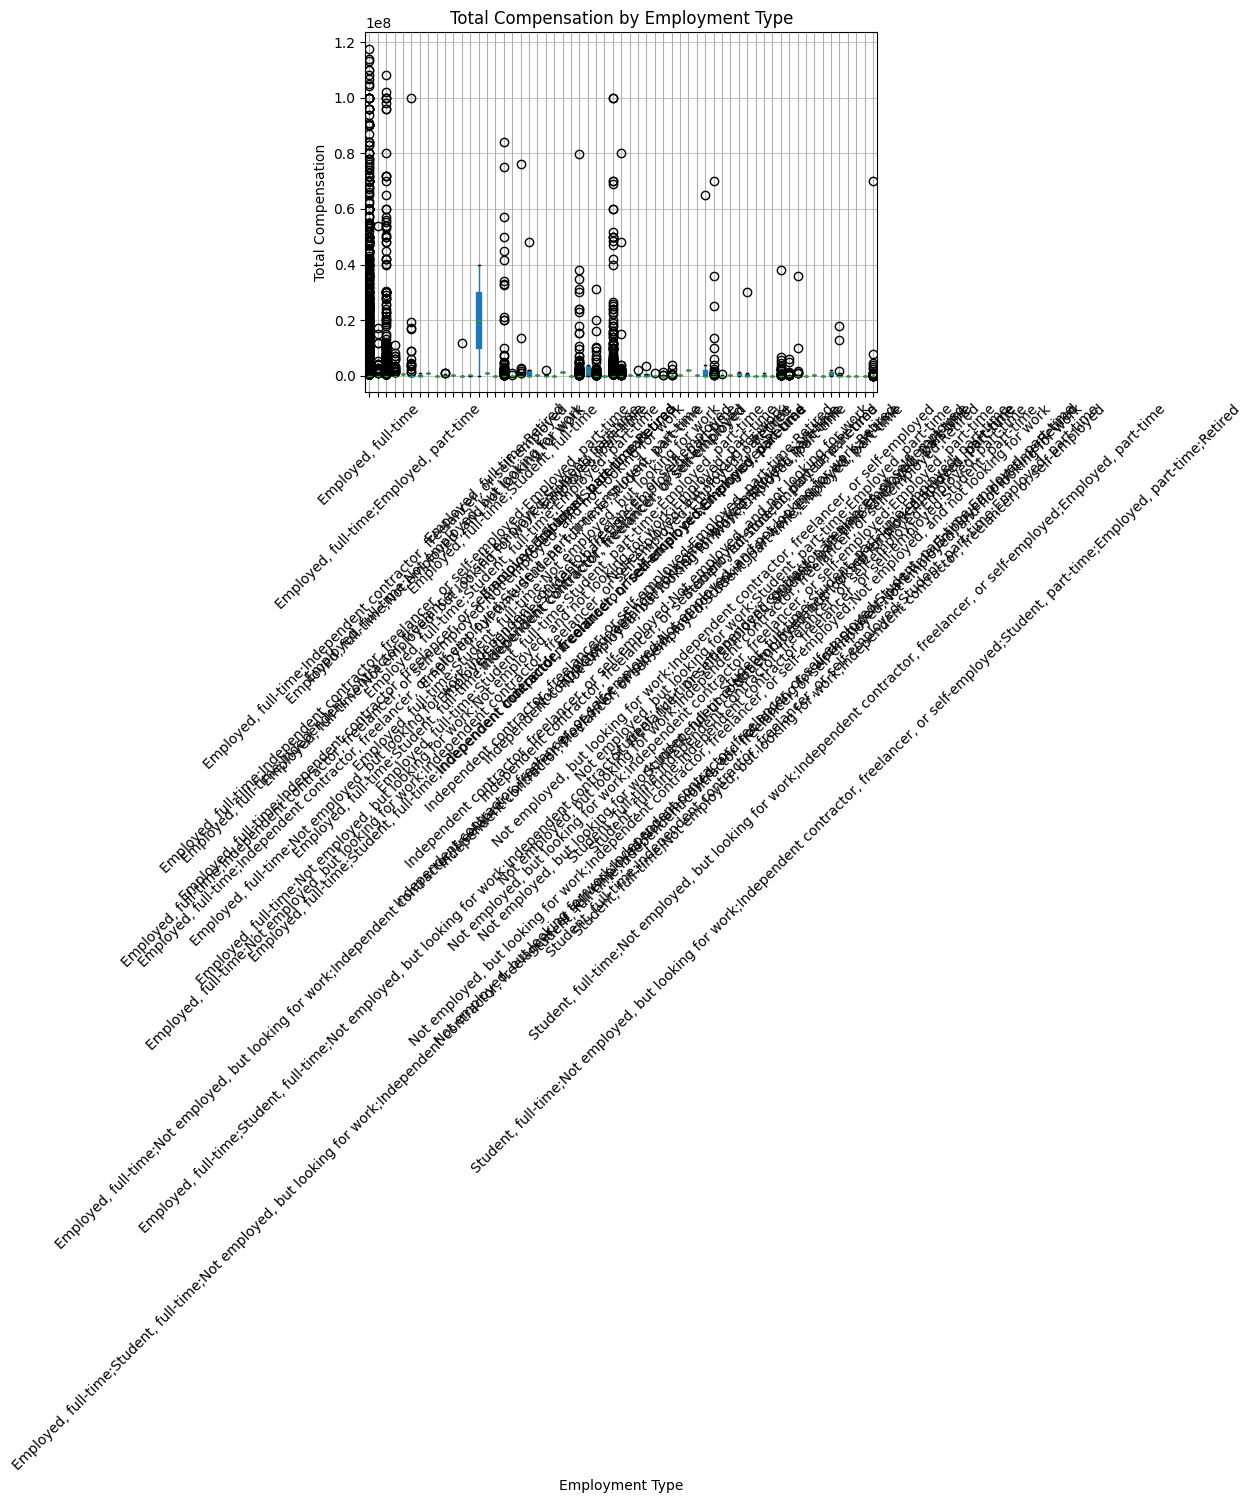

In [14]:
query = "SELECT Employment, CompTotal FROM main"
df = pd.read_sql_query(query, conn)

df = df.dropna(subset=['Employment', 'CompTotal'])

max_comp = df['CompTotal'].quantile(0.99)
df_filtered = df[df['CompTotal'] <= max_comp]

plt.figure(figsize=(12,6))
df_filtered.boxplot(column='CompTotal', by='Employment', patch_artist=True)
plt.title('Total Compensation by Employment Type')
plt.suptitle('')  # remove default title
plt.ylabel('Total Compensation')
plt.xlabel('Employment Type')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1200x600 with 0 Axes>

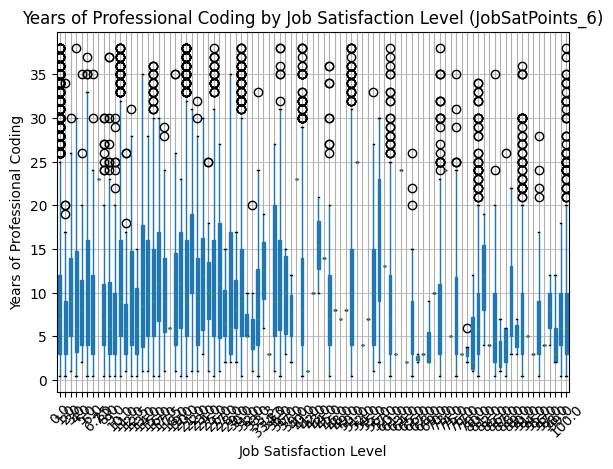

In [15]:
query = "SELECT YearsCodePro, JobSatPoints_6 FROM main"
df = pd.read_sql_query(query, conn)

df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

def convert_years(x):
    try:
        return float(x)
    except:
        if str(x).lower() in ['less than 1 year']:
            return 0.5
        elif str(x).lower() in ['more than 50 years']:
            return 51
        else:
            return None

df['YearsCodeProNumeric'] = df['YearsCodePro'].apply(convert_years)
df = df.dropna(subset=['YearsCodeProNumeric'])

max_years = df['YearsCodeProNumeric'].quantile(0.99)
df_filtered = df[df['YearsCodeProNumeric'] <= max_years]

plt.figure(figsize=(12,6))
df_filtered.boxplot(column='YearsCodeProNumeric', by='JobSatPoints_6', patch_artist=True)
plt.title('Years of Professional Coding by Job Satisfaction Level (JobSatPoints_6)')
plt.suptitle('')  # remove default title
plt.ylabel('Years of Professional Coding')
plt.xlabel('Job Satisfaction Level')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [16]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
